This notebook investigates the Central Limit Theorem (CLT) for both observational data and discrete random variables. Also, the standard error is briefly discussed at the end.

# The Central Limit Theorem (CLT)

When drawing a sample of size n from a population with mean $\mu$ and variance $\sigma^2$, the distribution of the sample means approaches a normal distribution $N(\mu, \sigma^2/n)$ as n increases.

Example:
- For a sample of size 5, the variance of the sample means is $\frac{\sigma^2}{5}$
- For a sample of size 100, the variance of the sample means is $\frac{\sigma^2}{100}$

In the following cells, we will investigate whether the CLT holds true for observational data and discrete random variables. We will observe how the variance of the sample means decreases as the sample size n increases, verifying the behavior predicted by the CLT.

## Notation for Population and Sample

Before we proceed to explore the CLT through examples, let's quickly review the notation and formulas used to describe population and sample statistics.

Population:

- Size: $N$
- Mean: $$\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$$
- Variance: $$\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2$$
- Standard deviation: $$\sigma = \sqrt{\sigma^2}$$


Sample:

- Size: $n$
- Mean: $$\bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i$$
- Variance (biased): $$s_n^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{X})^2$$
- Variance (unbiased): $$s_{n-1}^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{X})^2$$
- Standard deviation: $$s = \sqrt{s_{n-1}^2}$$



In [16]:
# Import libs
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 3)

Expected variance (σ^2/n): 5.000
Actual variance of sample means: 4.909


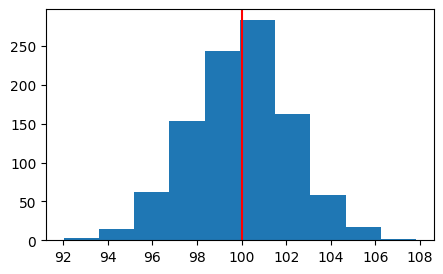

In [19]:
# 1. Verification of the Central Limit Theorem with Observational Data

def variance_observational_data(n):
  mu = 100 # populcation mean
  sigma = 5 # population standard deviation
  pop_var = sigma ** 2 # population var
  attempt = 1_000 # number of attempts

  # to store sample means
  sample_means = []

  for _ in range(attempt):
    sample = np.random.normal(mu, sigma, n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

  plt.hist(sample_means)
  plt.axvline(mu, color='red')  # draw population mean

  print(f"Expected variance (σ^2/n): {pop_var/n:.3f}")
  print(f"Actual variance of sample means: {np.var(sample_means):.3f}")

n = 5 # sample size
variance_observational_data(n)

Expected variance (σ^2/n): 0.250
Actual variance of sample means: 0.244


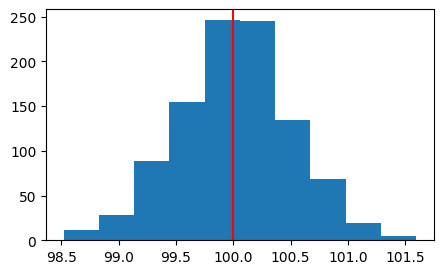

In [23]:
n = 100 # sample size
variance_observational_data(n)

Expected variance (σ^2/n): 0.583
Actual variance of sample means: 0.574


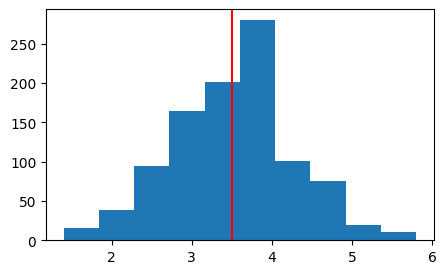

In [24]:
# 2. Verification of the Central Limit Theorem with discrete random variables

def variance_discrete_random_variable(n):
  attempt = 1_000 # number of attempts

  # store possible values of a die in an array
  dice_data = np.arange(1, 7)

  # to store sample means
  sample_means = np.array([])

  for _ in range(attempt):
    sample_means = np.append(sample_means, np.random.choice(dice_data, n).mean())

  # expected value and variance of a die roll
  E = dice_data.sum() / len(dice_data)
  pop_var = np.square(dice_data - E).sum() / len(dice_data)

  plt.hist(sample_means)
  plt.axvline(E, color='red') # draw expected value

  print(f"Expected variance (σ^2/n): {pop_var/n:.3f}")
  print(f"Actual variance of sample means: {sample_means.var():.3f}")

n = 5 # sample size
variance_discrete_random_variable(n)

Expected variance (σ^2/n): 0.029
Actual variance of sample means: 0.028


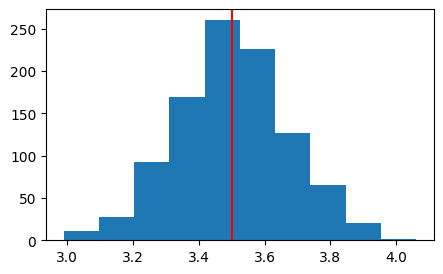

In [25]:
n = 100 # sample size
variance_discrete_random_variable(n)

# Standard Error (SE)

The above experiments confirm that the CLT holds for observational data and discrete random variables.

As the sample size increases, the variance of the sample means approaches $\frac{\sigma^2}{n}$, so the standard deviation of the sample means approaches $\frac{\sigma}{\sqrt{n}}$.

We take n samples from a population and examine the sample mean. How different is the obtained sample mean from the population mean?
The difference between the mean of a sample of size n and the population mean can be estimated by the standard deviation of the sample means, known as the standard error (SE).

$$\text{Standard deviation of the sample means} = \text{Standard Error (SE)}$$

However, since the population variance is usually unknown, we use the unbiased sample variance $s_{n-1}^2$ to calculate the SE. It has been shown by the CLT that the standard deviation of the sample means approaches $\frac{\sigma}{\sqrt{n}}$, so:

$$SE = \sqrt{\frac{s_{n-1}^2}{n}} = \frac{s_{n-1}}{\sqrt{n}}$$

The standard error is widely used in statistical inference such as t-tests.